# Pandas and Advanced plotting
- introduce pandas
- filehandling with pandas
- pandas with pyplot
- pandas with seaborn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Pandas DataFrames
[Pandas](https://pandas.pydata.org/) DataFrames are object that model tables/spreadsheets. They have a lot of functionality for data processing and visualisation. Furthermore they are compatible with a lot of other data processing libraries such as [scikit-learn](https://scikit-learn.org/stable/) which is discussed in chapter 7.

You can create Dataframes from a dictionary as is shown below:

In [2]:
data = {
    "A": [1, 2, 3],
    "B": np.random.rand(3),
    "C": ["a", "b", "c"]
}
data

{'A': [1, 2, 3],
 'B': array([0.30298416, 0.81141909, 0.09652933]),
 'C': ['a', 'b', 'c']}

In [3]:
df = pandas.DataFrame(data)

In [4]:
df

,A,B,C
0,1,0.302984,a
1,2,0.811419,b
2,3,0.096529,c


## Columns 
The columns are implemented as a class called series. You can use them almost like np.arrays.
It's easy and convenient to access and manipulate the rows using the square brackets and the columns name. As a bonus this also yields fairly readable code.

In [5]:
df["D"] = df["A"] + df["B"]**2

In [6]:
df

,A,B,C,D
0,1,0.302984,a,1.091799
1,2,0.811419,b,2.658401
2,3,0.096529,c,3.009318


In [7]:
# access columns A
df["A"]

0    1
1    2
2    3
Name: A, dtype: int64

In [8]:
df[["A", "B", "D"]]

,A,B,D
0,1,0.302984,1.091799
1,2,0.811419,2.658401
2,3,0.096529,3.009318


## Logical Indexing
Like numpy arrays, there is also logical indexing with Series/DataFrame columns. 

In [9]:
# creating a logical array works just as with numpy
L = df["A"] == 2
L

0    False
1     True
2    False
Name: A, dtype: bool

The logical vectors can be used to extract entire rows from a dataframe or just elements in a column/Series object.

In [10]:
# extract rows using the logical vector.
df[L]

,A,B,C,D
1,2,0.811419,b,2.658401


In [11]:
# extract elements in a column
df["A"][L] 

1    2
Name: A, dtype: int64

In [12]:
df["B"][L]

1    0.811419
Name: B, dtype: float64

# Loading from and to file

Very practical is the fact that you can open.csv files. I downloaded some random data from the ecdc regarding corona. its in a csv file format. I took it from here https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [13]:
df_corona = pandas.read_csv("data/ecdc_corona.csv")

In [14]:
df_corona

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
1,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
2,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01
3,07/12/2020,2020-49,1672,137,Afghanistan,AF,AFG,38041757.0,Asia,7.22
4,30/11/2020,2020-48,1073,68,Afghanistan,AF,AFG,38041757.0,Asia,6.42
...,...,...,...,...,...,...,...,...,...,...
9359,20/04/2020,2020-16,11,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.11
9360,13/04/2020,2020-15,5,2,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9361,06/04/2020,2020-14,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
9362,30/03/2020,2020-13,5,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05


## Use case: analyze corona data for Austria

In [15]:
# let's get all the data regarding austria
is_austria = df_corona["countriesAndTerritories"] == "Austria"

df_austria = df_corona[is_austria]

print(f"Rows concerning austria: {np.sum(is_austria)}")

Rows concerning austria: 52


In [16]:
# sort data by date.
#df_austria = df_austria.sort_values("dateRep") # --> does not work because data is in wired format
df_austria = df_austria.sort_index(ascending=False) # --> just flip it upside down

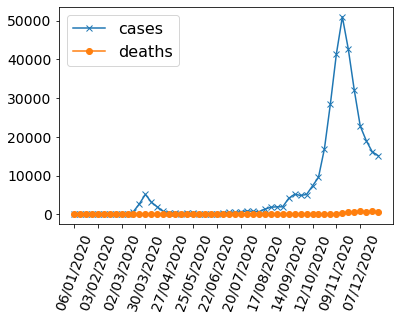

In [17]:
# this sets the size (and thus shape) of the figure
#plt.figure(figsize=(8, 4))

plt.plot(df_austria["dateRep"], df_austria["cases_weekly"], "x-", label="cases")
plt.plot(df_austria["dateRep"], df_austria["deaths_weekly"], "o-", label="deaths")

# use only every ourth date, rotate and increase fontsize
plt.xticks(df_austria["dateRep"].iloc[::4], rotation=70, fontsize=14);
plt.yticks(fontsize=14);

# use legend with suitable font size
plt.legend(fontsize=16)



In [18]:
# let's save this for later
df_austria.to_csv("data/ecdc_corona_austria.csv")

### Exercise
Find any csv unrelated to this course and visualize some of the data contained in it using pandas and pyplot as we did above.

# Seaborn 
Take a look at https://seaborn.pydata.org/. Their documentation is faily extensive and they have a lot of great examples that demonstrate their usefullness better than I could here.

In [19]:
import seaborn as sb

## The seaborn color palette
You can use the searborn style sheet as your default [style sheet](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html) to make your plots look nice. However some people worry about the fact that the contrast in the seaborn color palette is not as great as with matplotlib standards.

In [20]:
plt.style.use("seaborn")

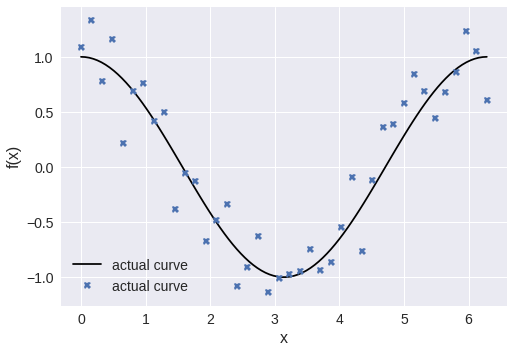

In [21]:
x = np.linspace(0, 2*np.pi, 40)
y = np.cos(x) + np.random.randn(*x.shape)*0.3
t = np.linspace(0, 2*np.pi, 100)

plt.plot(t, np.cos(t), "k-", label="actual curve")
plt.plot(x, y, "X", label="actual curve")

plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

plt.legend(fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

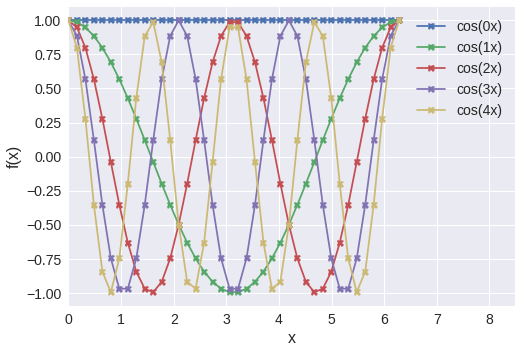

In [22]:
x = np.linspace(0, 2*np.pi, 40)

for i in range(5):
    y = np.cos(i*x) #+ np.random.randn(*x.shape)*0.3
    plt.plot(x, y, "X-", label=f"cos({i}x)")

plt.xlabel("x", fontsize=16)
plt.ylabel("f(x)", fontsize=16)


plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

# make some room for the legend
plt.xlim(0, 2.7*np.pi)

plt.legend(fontsize=14)



## Heatmap

In [23]:
# make a dict with random data
df = {}
for variable in "ABCDEFGHIJ":
    df[variable] = np.random.rand(10)
    
# create df from this dict
df = pandas.DataFrame(df)

In [24]:
correlation = df.corr()

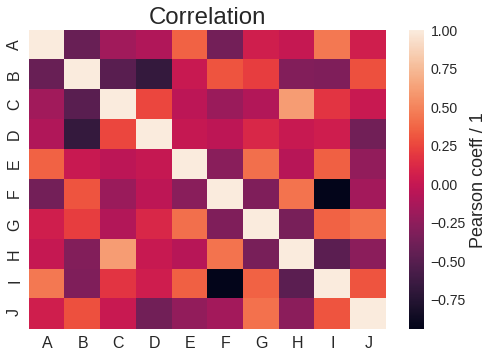

In [25]:
# create heatmap plot
ax = sb.heatmap(correlation)

plt.title("Correlation", fontsize=24)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

# increase colorbar tick label size and add label
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label("Pearson coeff / 1", fontsize=18)

# Demo: Seaborn + Pandas
Taken from https://seaborn.pydata.org/examples/grouped_boxplot.html

This is the true power of seaborn: it very nicely fits together with pandas. Seaborn takes the Dataframe (via the parameter _data_ and gives you a nice plot after you specify which columns you want to use for the respective axes.

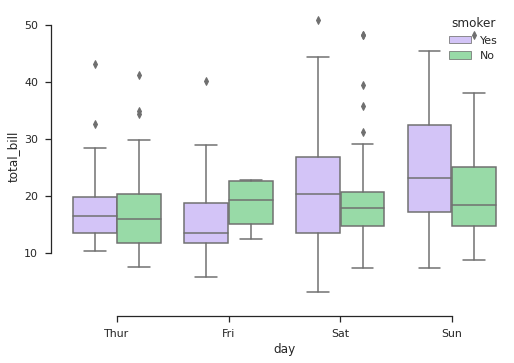

In [28]:
sb.set_theme(style="ticks", palette="pastel") 

# Load the example tips dataset
df_tips = sb.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sb.boxplot(
    
    # the dataframe whose data you want to visualize
    data=df_tips,
    
    # all the columns from the dataframe you want to visualize
    x="day", 
    y="total_bill",
    hue="smoker", 
    palette=["m", "g"],
)

# some cosmetics
sb.despine(offset=10, trim=True)